In [32]:
import numpy as np
import matplotlib.pyplot as plt

Выберите ваше любимое непрерывное распределение. Сгенерируйте из него выборку объёма 1000

In [33]:
'''
Логисти́ческое распределе́ние в теории вероятностей и математической статистике 
— один из видов абсолютно непрерывных распределений
'''
loc = 0.
scale = 1.
fx = np.random.logistic(loc, scale, 1000)


In [34]:
fx

array([ 3.68187107e-01,  4.86991955e-01,  1.71400961e+00,  6.43164636e-01,
       -4.28500922e-01, -1.97316016e+00, -9.48949697e-01,  1.71902910e+00,
        6.34514137e-01, -6.72540355e-01,  3.24635711e-01, -5.02308581e+00,
       -7.93672791e-01, -2.95817762e+00, -8.82588988e-01, -1.20620893e+00,
        1.81473042e-01,  5.97696033e-01,  1.63668450e-01, -9.81274914e-01,
        6.02709495e-01,  3.62244084e+00,  3.23824428e+00, -1.43209868e-01,
       -2.11904672e+00,  2.28849362e+00,  1.43788423e+00, -1.13625661e+00,
        2.16725370e+00, -9.50868595e-01,  1.41162429e-01, -3.57360276e+00,
       -8.95941077e-01,  4.19497906e+00, -6.49049554e-01, -1.07601972e+00,
       -7.14179184e-01, -1.62312357e+00, -1.08623653e-01,  1.13668865e+00,
       -1.58820662e+00, -1.85256327e+00,  3.78202528e+00,  1.16185522e+00,
       -9.95417810e-01, -6.57996637e+00,  9.00390417e-01, -1.62524913e+00,
        2.63005099e-01,  1.15159024e+00,  5.45202895e-01, -2.32660633e+00,
        1.02434882e+00, -

Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

TypeError: unsupported operand type(s) for ** or pow(): 'numpy.ufunc' and 'float'

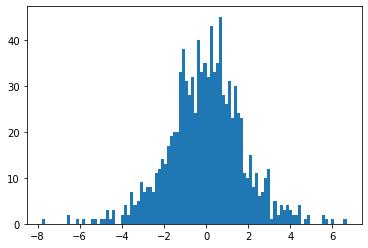

In [36]:
count, bins, ignored = plt.hist(fx, 100, align='mid') # 50 "карманов"

a = np.exp ** ((-(x-loc))/scale)
b = scale * np.pow((1 + a), 2)
pfx = a / b



x = np.linspace(min(bins), max(bins), 1000)
#pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pfx, linewidth=2, color='r')
#plt.axis('tight')
#plt.grid()
#plt.xlabel('$x$')
plt.show()